In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

In [2]:
# https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
from matplotlib.ticker import FuncFormatter

## 코스피 종목코드 수집

+ 코스피 종목코드 : https://gist.github.com/allieus/733725662c644ab56c9db9d3cdf77ed1

In [4]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://bit.ly/3g5YKXT", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

#dtype==문자열인데 , 숫자도 판다스가 자동 판단하므로 이렇게  넣어주어야 하고

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [7]:
kospi_series = kospi_df['종목코드']

## 3개 종목의 일별 거래량 크롤링

In [8]:
code = kospi_series['삼성전자']
삼성전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['LG전자']
LG전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

In [9]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['종가'],
    'LG전자': LG전자_volume_df['종가'],
    'SK하이닉스': SK하이닉스_volume_df['종가'],
})
print(df.shape)
df.head()

(90, 3)


,삼성전자,LG전자,SK하이닉스
날짜,,,
2021-09-29,74100.0,129500.0,100000.0
2021-09-28,76300.0,132500.0,103500.0
2021-09-27,77700.0,138500.0,104500.0
2021-09-24,77300.0,139500.0,104000.0
2021-09-23,77400.0,140500.0,105500.0


In [11]:
# 삼성전자_volume-df['종가'].head()

NameError: name '삼성전자_volume' is not defined

## 시각화

In [13]:
'{:,}'.format(10000000)

'10,000,000'

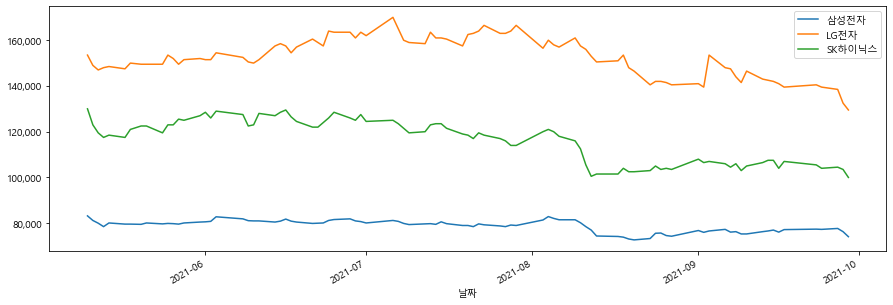

In [14]:
ax = df.plot(figsize=(15, 5))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: '{:,}'.format(int(y))))

In [16]:
import xlwings as xw

In [18]:
name = '코스피 3개 종목별 일별 거래량 시각화'
sheet = xw.sheets.active
sheet.range('A14').value = name
sheet.range('A15').value = df.iloc[:10]

<Picture '코스피 3개 종목별 일별 거래량 시각화' in <Sheet [통합 문서1]Sheet4>>

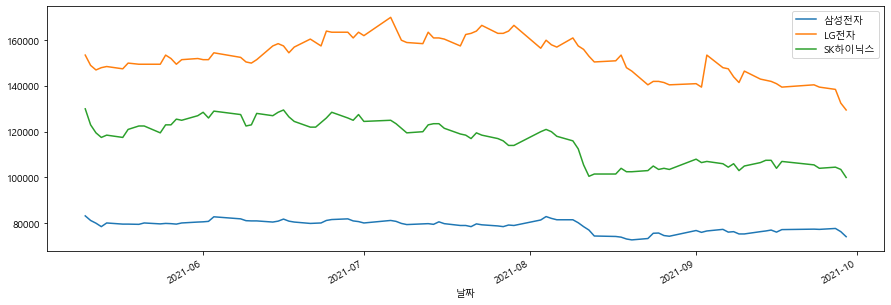

In [21]:
ax = df.plot(figsize=(15,5))

left = sheet.range('F14').left
top = sheet.range('F14').top

sheet.pictures.add(ax.figure, name=name, update=True, left=left, top=top)